<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/7/7-1/%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망
 - 인공 신경망
 - 텐서플로
 - 밀집층
 - 원 핫 인코딩

In [1]:
# 이번장에서 사용할 데이터 확인해 보기
from tensorflow import keras
(train_input,train_target),(test_input,test_target)= \
keras.datasets.fashion_mnist.load_data()

In [2]:
# 전달받은 데이터 확인해 보기
print(train_input.shape,train_target.shape)
# 학습 데이터의 경우 60,000개가 있고, 28*28 이미지로 이루어져 있으며
# target 데이터의 경우 60,000개의 원소가 있는 1차원 배열 데이터

(60000, 28, 28) (60000,)


In [3]:
# 테스트 데이터도 확인해보기
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


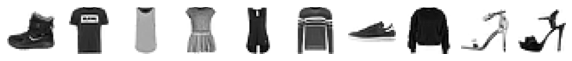

In [4]:
# 이미지 출력해서 어떤건지 한번 봐보자
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
# 타깃데이터 10개도 한번 출력해보자
print([train_target[i] for i in range(10)])
# mnist_fashion 데이터는 0~9까지 총 10개의 타겟 레이블로 되어 있으며
# 각 레이블들은 상품의 의미를 나타낸다.

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
# 로지스틱 회귀로 아이템 분류하기
# 한꺼번에 학습을 시키면 이미지 파일이면서 데이터의 양도 많기 때문에
# SGDClassifier를 사용하여 데이터를 확인해 보자

# 올바른 확률적 경사하강법을 사용하기 위해 0,1 정규화를 통해 값을 고르게 분포시킴
train_scaled = train_input / 255.0
# 이후 전체 샘플의 평균을 내기 위해 2차원 배열의 각 샘플을 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1,28*28)

In [8]:
print(train_scaled.shape)# 총 60,000개의 샘플과 784(28*28)개의 특성으로 바뀜

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 교차검증을 활용해 SGDClassifier 성능 검증
sc = SGDClassifier(loss='log',max_iter=5,random_state=42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


# 로지스틱 회귀의 공식을 MNIST에 적용하면
 - z(옷) = w1(1번 픽셀)+w2(2번 픽셀)+w3(3번 픽셀)....+w784(784픽셀)+ f
  > 28*28 = 784 픽셀수 -> 특성의 갯수
 - wn에 대한 가중치의 특성은 클래스 별로(MNIST_fashion 예제에서는 티셔츠, 바지, 신발 등의 클래스) 모두 다르다.

# 인공 신경망
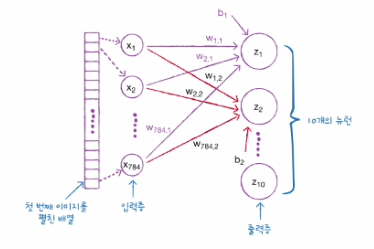<br>
 - 최종 클래스(옷에 대한 종류)를 출력층 이라고 함 -> 10개의 뉴런 / 유닛이 있다.
 - 각 유닛을 표현하기 위한 픽셀(특성)은 입력층 이라고 한다.

In [10]:
# 텐서플로우를 사용한 인공신경망 모델
import tensorflow as tf
# 텐서플로에서는 케라스라는 고수준의 딥러닝 API가 있음
# 이러한 딥러닝 API와 기존 머신러닝 알고리즘의 차이는
# GPU를 사용한다는 것 이다. 이는 GPU가 백터와 행렬연산에 
# 매우 최적화 되어 있어 곱셈과 덧셈에 많이 수행되는 인공 신경망에 큰 도움이 됨

# 케라스 사용하기
from tensorflow import keras
# 케라스를 사용하여 간단한 인공신경망 만들기


In [11]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

# 신경망 모델에서는 데이터를 따로 교차검증을 진행하지 않고 사용한다.

In [12]:
# 훈련데이터와 검증데이터 모양 나누기
print(train_scaled.shape,  train_target.shape)
print(val_scaled.shape,  val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


# 인공신경망 만들기
 - 예제에서는 기본적으로 10개의 뉴런(10개의 옷의 종류)으로 구성됨
 - 가장 기본으로 구성되어야 할 첫번째는 ***밀집층*** 이다.
 - 밀집층이란 특성과 연결된 모든 뉴런의 층으로, 예제에서는 784 픽셀 * 10개의 특성 = 7840개의 밀집층이 존재한다. 
 - 위와같이 모든 특성과 뉴련이 연결되어 있는 층을 완전 연결층 이라고 한다. 

In [13]:
# 밀집층 만들기

#밀집층 dense
# 밀집층을 만들기 위한 Dense 클래스의 매개변수는
# Dense(뉴련의 개수 , 뉴런 출력에 사용할 함수,  입력의 크기) 와 같다.
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [14]:
# 만든 밀집층 dense로 신경망 모델을 만들어보자
# 모델을 만들기 위해서는 keras의 Sequential 클래스를 통해 밀집층을 넣어야 함
model = keras.Sequential(dense)

# 만든 인공신경망으로 아이템 분류하기

In [15]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
# loss='' 부분은 손실함수 정의 부분이다.
# 이진분류는 binary_crossentropy
# 다중분류는  categorical_crossentropy 를 사용한다.


# 다중분류의 경우 클래스 전체에 대한 확률을 출력층에서 출력을 한다.
# 이후 각 뉴런에 맞게 [1,0]을 곱해 내가 원하고자 하는 클래스의 확률만을 출력한다.
# 예로 위에서는 총 10개의 클래스가 있고, 이중 옷만 뽑아내고자 하면
# a1,a2,a3............a10] * [1,0,0,0,....0] 을 곱해 첫번째 클래스(옷)만을
# 뽑아냄
# 위와같이 본인이 타깃하는 요소만 뽑아내고 나머지는 모두 0으로 만드는 작업을
# 원-핫 인코딩(one-hot encoding)이라고 부른다.

In [16]:
# 타겟데이터는 어떻게 되어있는지?
print(train_target[:10])
# 모두 정수로 되어있지만, 위에서 손실함수처럼 사용을 하려면
# 0과 1로 되어있어야 한다.
# 하지만 케라스에서는 아래와 같이 정수로 된 타깃값을 그대로 사용할 수 있는데
# 이는 손실함수를 loss='sparse_categorical_crossentropy' 로 정의했기에 사용이 가능함
# 타깃값이 원 핫 인코딩 되어 있다면, 손실함수 loss='categorical_crossentropy' 로 사용할 수 있다.

[7 3 5 8 6 9 3 3 9 9]


In [17]:
model.fit(train_scaled, train_target,epochs=5)
# 위에서 model.compile 부분에서 metrics='accuracy'를 지정하여 매 에포크 마다 정확성을 측정함

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6062 - accuracy: 0.7943
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4794 - accuracy: 0.8404
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4432 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4374 - accuracy: 0.8553


In [18]:
# 검증데이터를 통해 모델 성능 평가해보기
model.evaluate(val_scaled,val_target)


375/375 [==============================] - 1s 1ms/step - loss: 0.4456 - accuracy: 0.8529


[0.445597767829895, 0.8529166579246521]

# 이번장 마무리
 - 인공 신경망 : 생물학적 뉴런에서 영감을 받은 머신러닝 알고리즘으로 딥러닝이라고도 불림
 - 밀집층 : 가장 간단한 인공신경망 층으로 모든 입력층이 모든 출력층과 연결이 된 층
 - 원핫 인코딩 : 내가 타겟팅항 뉴런만 1이고 나머지는 모두 0으로 반환하는 것